* NAME: RISHABH PATIL
* SAP: 60009200056
* BATCH: K2

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/breastcancer.csv")
data['diagnosis'].replace('B',0,inplace=True)
data['diagnosis'].replace('M',1,inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
from sklearn.model_selection import train_test_split
feature_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
x = data[feature_col]
y = data.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)
print(x_train.shape)
print(y_train.shape)
clf = DecisionTreeClassifier(random_state = 1234)
model = clf.fit(x,y)

(455, 30)
(455,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix
ac_list_test = []
ac_list_train = []
cm_list = []
for i in range(1,101):
  DT = DecisionTreeClassifier(max_depth = i)
  DT = DT.fit(x_train,y_train)
  y_pred = DT.predict(x_test)
  y_pred1 = DT.predict(x_train)
  ac_list_test.append(accuracy_score(y_test,y_pred))
  ac_list_train.append(accuracy_score(y_train,y_pred1))
  cm_list.append(confusion_matrix(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


Text(0.5, 0, 'max_depth')

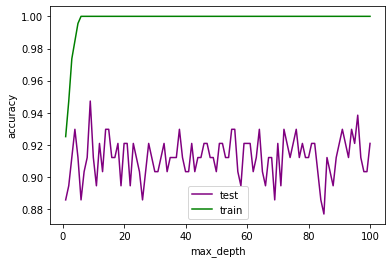

In [ ]:
import matplotlib.pyplot as plt
max_depth = list(range(1,101))
plt.plot(max_depth,ac_list_test,label='test',color='purple')
plt.plot(max_depth,ac_list_train,label='train',color='green')
plt.legend(loc='bottom right')
plt.ylabel('accuracy')
plt.xlabel('max_depth')

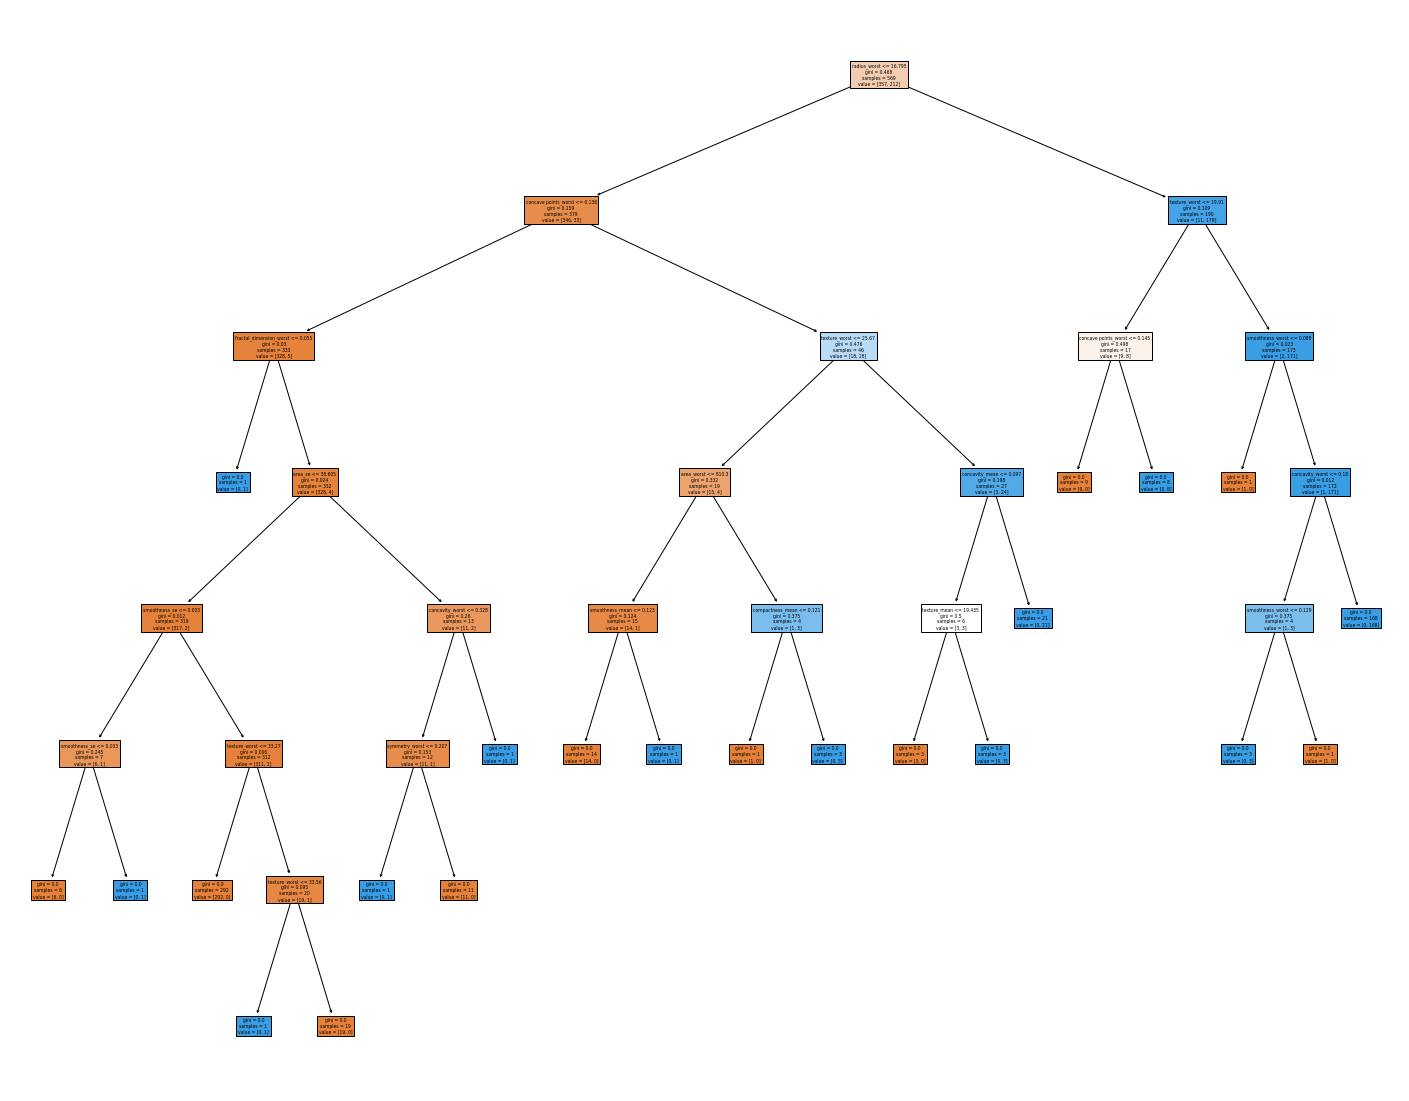

In [ ]:
from sklearn import tree
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(clf,feature_names=feature_col,filled=True)